# Visualising car data

 You may explore the [metadata for this dataset](https://jse.amstat.org/v1n1/datasets.lock.html) to gain a better understanding of the features. 

In [1]:
# Importing Libraries.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Inline indicates graphs should be presented as a cell output.
%matplotlib inline

In [10]:
# Loading data.
car_data = pd.read_csv('Cars93.csv', index_col = 0, keep_default_na=False)
car_data.head(5) 
# Note the additional keep_default_na parameter which is set to False. 
# This ensures that pandas does not interpret the None string in the 
# AirBags column as NaN.

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30,15,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28,14,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31,17,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27,13,3640,non-USA,BMW 535i


## Explore the data

In [11]:
# Getting column names.
car_data.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [12]:
# Getting a random sample of data.
car_data.sample(5)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
46,Hyundai,Scoupe,Sporty,9.1,10.0,11.0,26,34,None,Front,...,4,166,94,64,34,23.5,9,2285,non-USA,Hyundai Scoupe
53,Mazda,323,Small,7.4,8.3,9.1,29,37,None,Front,...,4,164,97,66,34,27,16,2325,non-USA,Mazda 323
57,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,NA,NA,2895,non-USA,Mazda RX-7
64,Nissan,Sentra,Small,8.7,11.8,14.9,29,33,Driver only,Front,...,5,170,96,66,33,26,12,2545,non-USA,Nissan Sentra
91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,4,159,97,66,36,26,15,2810,non-USA,Volkswagen Corrado


In [14]:
# Getting numbers of rows and columns.
car_data.shape

(93, 27)

In [15]:
# Getting list of unique manufacturers.
car_data['Manufacturer'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrylser', 'Chrysler', 'Dodge', 'Eagle', 'Ford', 'Geo', 'Honda',
       'Hyundai', 'Infiniti', 'Lexus', 'Lincoln', 'Mazda',
       'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile',
       'Plymouth', 'Pontiac', 'Saab', 'Saturn', 'Subaru', 'Suzuki',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [ ]:
# Get the number of unique manufacturers
car_data['Manufacturer'].nunique()

32

## Scatterplot examples

For simple plots you can either use the pandas `.plot()` method (which uses matplotlib as the default in its backend) or matplotlib. Below are examples of creating a scatterplot with both options.

### pandas .plot() method

In [ ]:
# Select features for scatterplot
scatter_features = pd.DataFrame({'Horsepower': car_data['Horsepower'], 
                                'Price': car_data['Price']})

<Axes: title={'center': 'Horsepower vs Price'}, xlabel='Horsepower (max)', ylabel='Average price of model'>

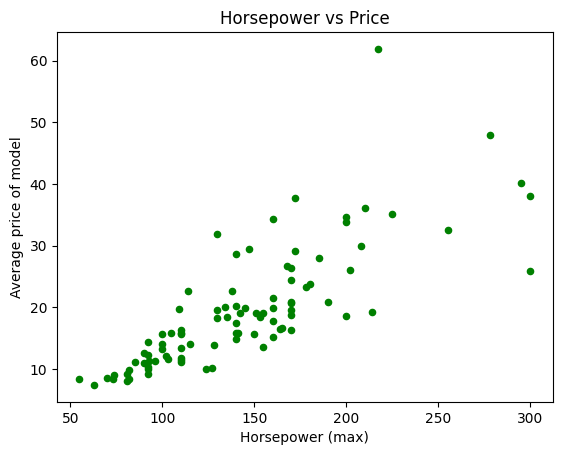

In [ ]:
# Plot a bar chart showing the number of models in each airbag category
scatter_features.plot.scatter(x='Horsepower', y='Price', 
                              legend=False, title="Horsepower vs Price",
                              ylabel="Average price of model", xlabel="Horsepower (max)",
                              color='green')

### matplotlib method

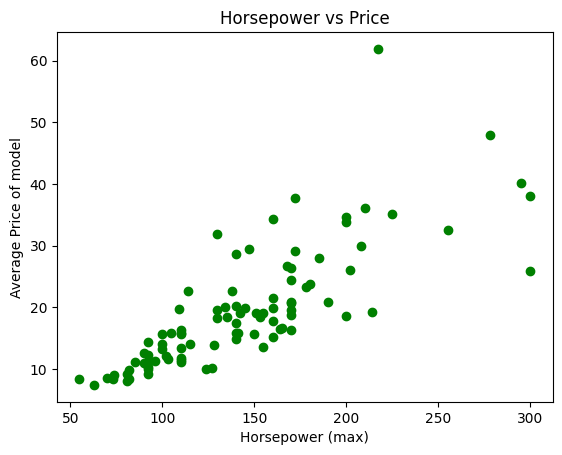

In [ ]:
# Select rows from the dataframe for plotting 
x = car_data['Horsepower'].values
y = car_data['Price'].values

# Create scatterplot
plt.scatter(x,y,color = 'g')
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower (max)')
plt.ylabel('Average Price of model')
plt.show()

## Groupby mean: barchart

Group-by can be used to build groups of rows based on a specific feature in your dataset, e.g. the ‘Type’ categorical column. 

In [ ]:
# Group data by'Type'
group_by_type = car_data.groupby(by=['Type'])

# Get the mean (average) for each type across all columns
# Note the mean can only be calculated for numeric values
car_data_avg = round(group_by_type.mean(numeric_only=True), 0) 
car_data_avg.sample(5)

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Weight
Type,,,,,,,,,,,,,,,,
Small,8.0,10.0,12.0,30.0,35.0,2.0,91.0,5633.0,2817.0,13.0,5.0,167.0,97.0,65.0,35.0,2313.0
Midsize,24.0,27.0,30.0,20.0,27.0,3.0,173.0,5336.0,2221.0,18.0,5.0,193.0,107.0,71.0,40.0,3400.0
Compact,16.0,18.0,21.0,23.0,30.0,2.0,131.0,5362.0,2476.0,16.0,5.0,182.0,103.0,67.0,38.0,2918.0
Large,23.0,24.0,26.0,18.0,27.0,4.0,179.0,4673.0,1627.0,19.0,6.0,205.0,113.0,75.0,43.0,3695.0
Sporty,17.0,19.0,22.0,22.0,29.0,2.0,160.0,5393.0,2314.0,16.0,4.0,175.0,98.0,69.0,39.0,2900.0


In [ ]:
# Create a DataFrame of only the relevant features to plot  
features_to_plot = pd.DataFrame({'MPG.highway': car_data_avg['MPG.highway'],
                                 'MPG.city': car_data_avg['MPG.city']})

<Axes: xlabel='Type', ylabel='Average MPG'>

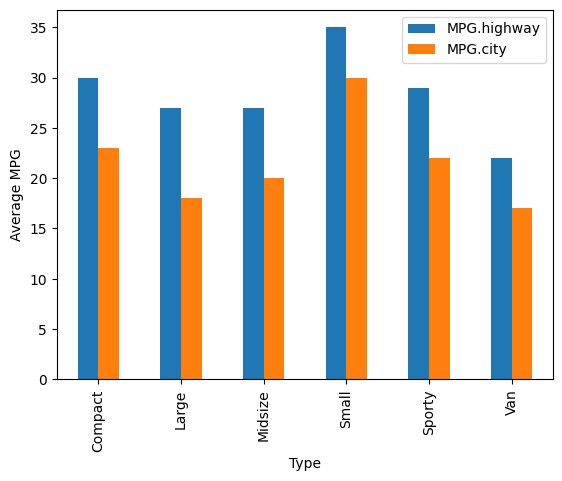

In [ ]:
# Plot the average miles per gallon (MPG) for highway 
# driving and city driving for each type of car
features_to_plot.plot(kind='bar', ylabel="Average MPG")

## Groupby count: barchart

In [ ]:
car_data['AirBags'].unique()

array(['None', 'Driver & Passenger', 'Driver only'], dtype=object)

In [ ]:
# Group by 'Airbags' and count models in each airbag category
car_AirBagscount = car_data.groupby('AirBags').count()

# View grouped data
car_AirBagscount

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,DriveTrain,Cylinders,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
AirBags,,,,,,,,,,,,,,,,,,,,,
Driver & Passenger,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Driver only,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
None,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34


In [ ]:
# Create a DataFrame with the first column and all rows
car_AirBagscount = pd.DataFrame(car_AirBagscount.iloc[:, 0])

# Rename the first column to 'Count'
car_AirBagscount.rename(columns={'Manufacturer': 'Count'}, inplace=True)

<Axes: title={'center': 'Airbag Count'}, xlabel='Airbag categories', ylabel='Number of Models'>

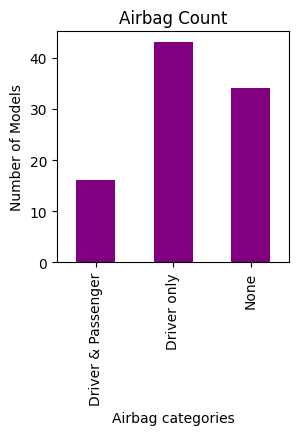

In [ ]:
# Plot a bar chart showing the number of models in each airbag category
car_AirBagscount.plot.bar(figsize=(3, 3), legend=False, title="Airbag Count", 
                          ylabel="Number of Models", xlabel="Airbag categories",
                          color='purple')